In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go 
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits  
from sklearn.decomposition import PCA

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


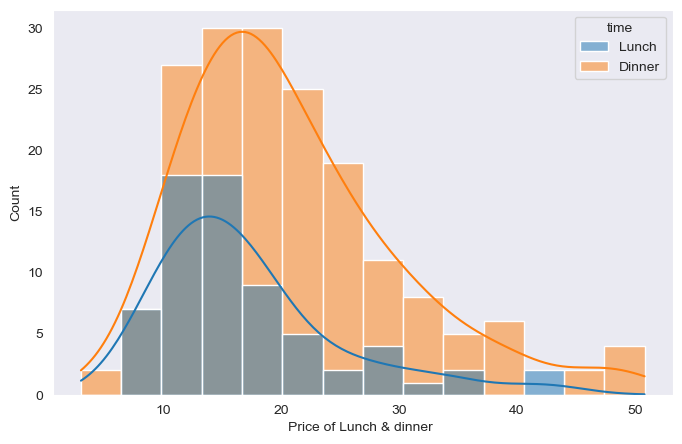

In [19]:
#데이터셋의 통계함수
# tips.describe() 

#데이터셋의 기본정보
# tips.info() 

#점심/ 저녁식사 비용을 히스토그램으로 시각화

sns.set_style("dark")
fig = plt.figure(figsize = (8,5))
ax_01 = fig.add_subplot(111)  

sns.histplot(x="total_bill", data=tips, hue="time", kde=True) 

ax_01.set_xlabel("Price of Lunch & dinner ") 
plt.show()

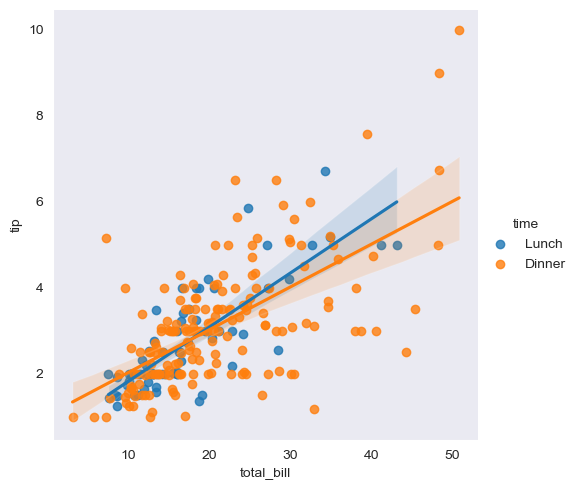

In [26]:
#점심 / 저녁 식사 비용 개수
tips["time"].value_counts()

#최소값  
tips["total_bill"].min()

# 최대값 
tips["total_bill"].max()

#식사비용 vs 팁 관계 시각화
sns.lmplot(x = "total_bill" , y = "tip" , data = tips , hue="time")

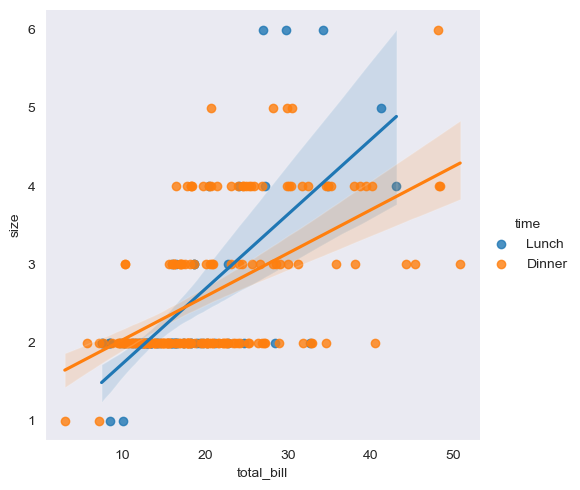

In [33]:
#팁하고 , 식사비용이 선형제 관계일거라 생각해서 만듬.  꽤나중요함 ★★
sns.lmplot(x = "total_bill" , y = "size" , data = tips , hue="time")

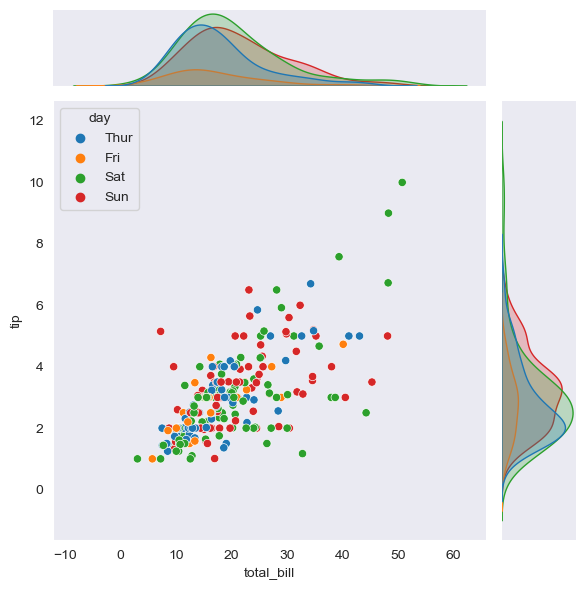

In [34]:
#요일별 식사 비용 및 팁의 관계 시각화
sns.jointplot(x = "total_bill", y = "tip",data = tips, hue="day")

In [36]:
#분석결과 : 식사비용이 크면, 일반적으로 팁도 크다
#           고객수가 많으면, 일반적으로 식사 비용도 늘어난다
#             일반적으로 주말에 식사비용이 크다.

In [41]:
# 와인 품질 데이터셋
red_wine = pd.read_csv('C:/Users/carlo/Desktop/AI_CWNU/documents/winequality-red.csv', delimiter = ";")
white_wine = pd.read_csv('C:/Users/carlo/Desktop/AI_CWNU/documents/winequality-white.csv', delimiter = ";") 
#구분자를 써줘야 데이터프레임처럼 나눠짐. #구분자는 파일켜서 확인해야함!

red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
#카테고리 채워 넣기. 이렇게해야 어느행이 red 인지 white 인지 알수있게해줌 
red_wine["category"]='red'
white_wine["category"]='white' 

#red  white 합치기 
total_wine =pd.concat([red_wine,white_wine] , axis=0).reset_index() #2개를 붙였을때 reset_인덱스를 기억해줘야함 ! ★★★ 
total_wine


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [62]:
#데이터 통계 정보 확인
total_wine.describe()

#결측치 확인
total_wine.isna().sum()


#d와인 품질 확인
#시각화를 위해 quality 열만 따로 추출
quality = total_wine["quality"]

#종류별 개수 확인
quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

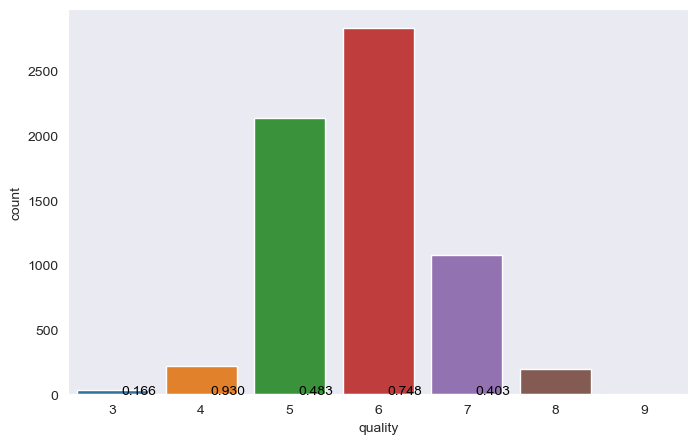

In [87]:
#일반 바 그래프 그리기 
# plt.figure(figsize = (8,5)) 
# sns.countplot(x = "quality" , data = total_wine) 
# plt.show() 
 
r = np.random.rand(5) 
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="quality", data=total_wine)

for i, v in enumerate(r):
    plt.text(i+0.1, v+0.02, "{:.3f}".format(v), color="black")

plt.show()

<Axes: >

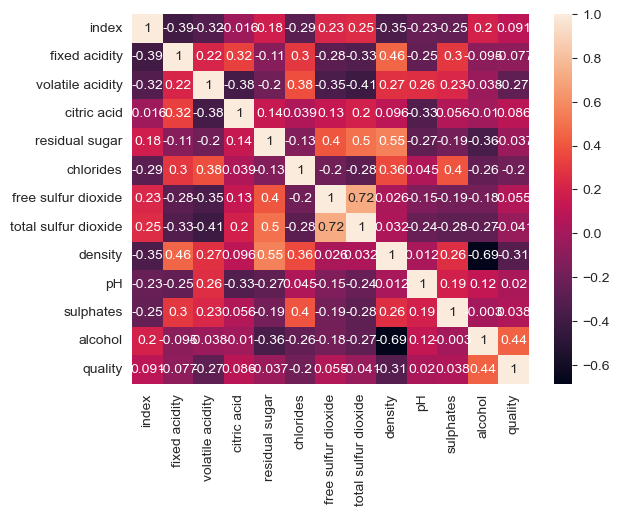

In [70]:
#상관관계 분석 
#quality 와 alcohol 은 양의 상관관계 , quality 와 volatile acidity는 음의 상관관계
sns.heatmap(data = total_wine.corr(numeric_only = True),
           cmap = "crest",
           cbar = True,
           annot = True)

<Figure size 1000x500 with 0 Axes>

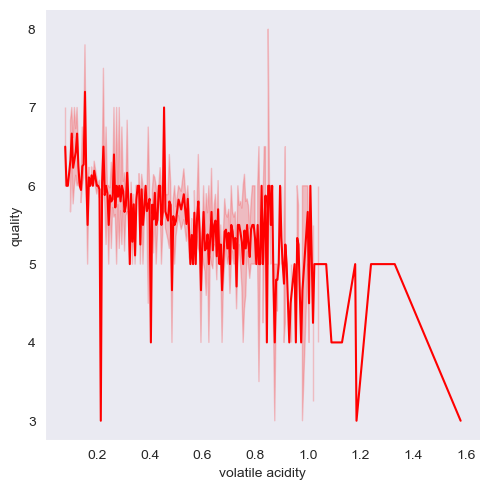

In [93]:
plt.figure(figsize=(10,5))
sns.relplot(x = "volatile acidity", y = "quality" ,data = total_wine , kind = "line", color = "red")
plt.show()

<Figure size 1000x500 with 0 Axes>

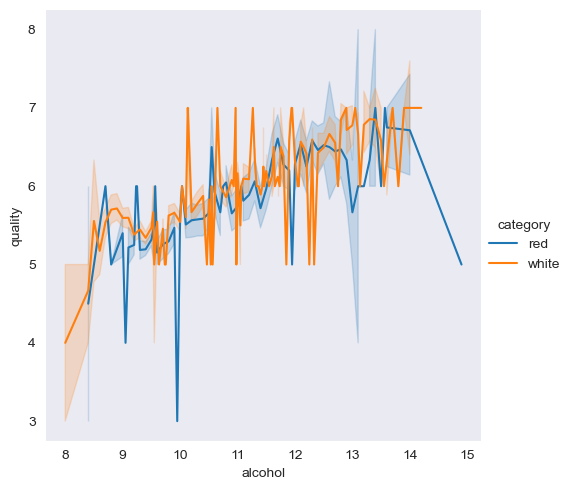

In [105]:
plt.figure(figsize=(10,5))
sns.relplot(x = "alcohol", y = "quality" ,data = total_wine , kind = "line", color = "red", hue="category")
plt.show()

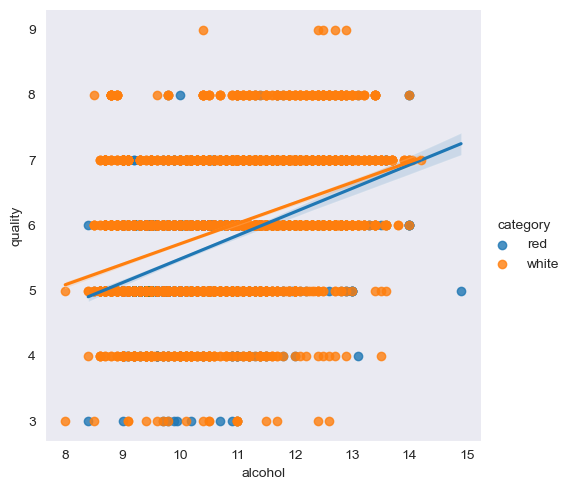

In [103]:
sns.lmplot(x = "alcohol", y = "quality" , data = total_wine , hue="category")

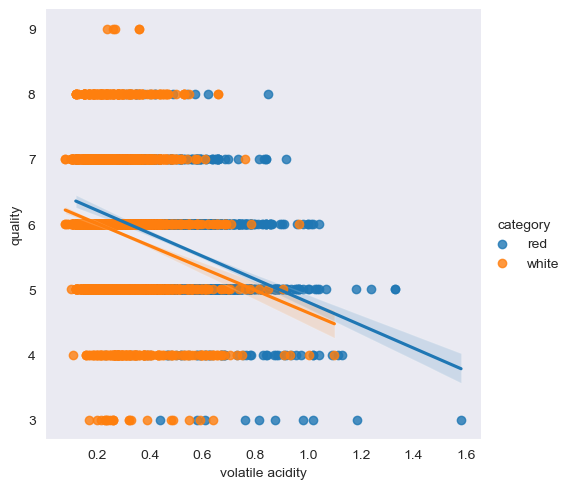

In [107]:
sns.lmplot(x = "volatile acidity", y = "quality" , data = total_wine , hue="category")

In [ ]:
#결과 : 
# 와인 품질이 좋으면 신맛이 약하다. 
# 와인 품질이 좋으면 알코올 함량이 높다.

In [5]:
#한글출력을 위한 코드 
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")


In [8]:
CCTV = pd.read_csv('C:/Users/carlo/Desktop/AI_CWNU/documents/CCTV_in_Seoul.csv', delimiter = ",", encoding="cp949")
CCTV

,구분,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655
5,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219
6,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448
7,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404
8,강북구,"3,090",8,0.0,22.0,61,124,251,29,391,1078,656,470
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593


In [9]:
#구분위치에 구별로 바꾸기  . 
CCTV.rename(columns = {CCTV.columns[0]:"구별"}, inplace=True)
# CCTV


#구별 인구 데이터
population_Seoul_df = pd.read_excel('C:/Users/carlo/Desktop/AI_CWNU/documents/Population_in_Seoul.xls',
                                    header = 2,
                                    usecols="B,D,G,J,N") 
population_Seoul_df.head(1)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0


In [12]:
#열 이름 변경 

population_Seoul_df.rename(columns ={population_Seoul_df.columns[0] : "구별",
                                    population_Seoul_df.columns[1] : "인구수",
                                    population_Seoul_df.columns[2] : "한국인",
                                    population_Seoul_df.columns[3] : "외국인",
                                    population_Seoul_df.columns[4] : "고령자"},
                          inplace=True)
population_Seoul_df

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


In [23]:
#CCTV 설치 대수를 오름 차순으로 정렬
CCTV.sort_values(by="소계",ascending=True).head()

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593
19,동작구,"2,306",41,24.0,25.0,503,128,253,271,300,322,419,20
17,금천구,"2,411",0,0.0,174.0,80,361,133,196,539,367,513,48
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403


In [16]:
#결측치 확인
CCTV.isna().sum() 

구별          0
소계          0
2012년 이전    0
2012년       1
2013년       1
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

In [27]:
#최근 증가률 
CCTV["최근증가율"] = ((CCTV["2019년"] + CCTV["2020년"] + CCTV["2021년"])/ CCTV["2018년"]*100  )
CCTV

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,"1,715",815,NaN,NaN,195,150,0,261,85,9,200,0,245.882353
1,중 구,"2,447",16,114.0,87.0,77,236,240,372,386,155,361,403,238.082902
2,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,921.600000
3,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,300.000000
4,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655,331.612903
5,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219,328.358209
6,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448,1397.126437
7,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404,158.131488
8,강북구,"3,090",8,0.0,22.0,61,124,251,29,391,1078,656,470,563.682864
9,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593,444.594595


In [43]:
#0번째 지우기 
population_Seoul_df.drop([0], inplace=True ) 

In [44]:
#여기에 만약 NAN 있다면 지우기 drop 하면됨 
population_Seoul_df["구별"].unique() 

population_Seoul_df.dropna(inplace=True)
# population_Seoul_df["구별"].unique() 

In [45]:
population_Seoul_df["외국인 비율"] = population_Seoul_df["외국인"]/population_Seoul_df["인구수"]*100
population_Seoul_df["고령자 비율"] = population_Seoul_df["고령자"]/population_Seoul_df["인구수"]*100
population_Seoul_df.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [49]:
#외국인이 많은곳 
population_Seoul_df.sort_values(by="외국인 비율", ascending=False).head(1)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191


In [50]:
#고령자가 많은곳 
population_Seoul_df.sort_values(by="고령자 비율", ascending=False).head(1)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [51]:
#CCTV 데이터프레임과 Population 데이터프레임을 병합. 

merged_df = pd.merge(CCTV , population_Seoul_df , on = "구별")
merged_df

,구별,소계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,용산구,"2,611",34,71.0,234.0,125,221,298,351,125,307,617,228,921.600000,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
1,성동구,"3,829",163,144.0,208.0,107,325,255,967,415,490,472,283,300.000000,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
2,광진구,"3,211",35,57.0,100.0,187,98,52,675,465,712,175,655,331.612903,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
3,동대문구,"2,628",4,0.0,14.0,16,115,804,814,201,218,223,219,328.358209,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
4,중랑구,"3,737",346,21.0,253.0,72,132,155,153,174,1049,934,448,1397.126437,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
5,성북구,"4,602",81,78.0,170.0,229,322,594,890,867,714,253,404,158.131488,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
6,강북구,"3,090",8,0.0,22.0,61,124,251,29,391,1078,656,470,563.682864,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
7,도봉구,"1,930",128,22.0,2.0,145,172,123,129,222,210,184,593,444.594595,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
8,노원구,"2,492",0,87.0,164.0,77,514,331,175,216,320,387,221,429.629630,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,은평구,"4,131",14,3.0,44.0,332,329,555,403,635,1057,288,471,285.984252,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [53]:
#2021~2021 지우기
del merged_df["2012년 이전"]
del merged_df["2013년"]
del merged_df["2014년"]
del merged_df["2015년"]
del merged_df["2016년"]
del merged_df["2017년"]
del merged_df["2018년"]
del merged_df["2019년"]
del merged_df["2020년"]
del merged_df["2021년"]

KeyError: '2012년 이전'

In [55]:
#그리고 구별을 인덱스로 
merged_df.set_index("구별",inplace = True)
merged_df

,소계,2012년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,,
용산구,"2,611",71.0,921.600000,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,"3,829",144.0,300.000000,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,"3,211",57.0,331.612903,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
동대문구,"2,628",0.0,328.358209,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
중랑구,"3,737",21.0,1397.126437,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
성북구,"4,602",78.0,158.131488,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
강북구,"3,090",0.0,563.682864,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
도봉구,"1,930",22.0,444.594595,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507
노원구,"2,492",87.0,429.629630,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [56]:
merged_df.info() #자세히보면 소계는 문자형임 그래서 정수형으로 바꿔줘야함. 

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 용산구 to 강동구
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      23 non-null     object 
 1   2012년   23 non-null     float64
 2   최근증가율   23 non-null     float64
 3   인구수     23 non-null     float64
 4   한국인     23 non-null     float64
 5   외국인     23 non-null     float64
 6   고령자     23 non-null     float64
 7   외국인 비율  23 non-null     float64
 8   고령자 비율  23 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.8+ KB


In [61]:
merged_df["소계"] = merged_df["소계"].str.replace(',','').astype(int)
# 소계에는 1.715 였는데 , 제거해서 1715 로 됨 , 그리고 astype으로 int로 변경

In [64]:
#결측치 확인
merged_df.isna().sum()

소계        0
2012년     0
최근증가율     0
인구수       0
한국인       0
외국인       0
고령자       0
외국인 비율    0
고령자 비율    0
dtype: int64

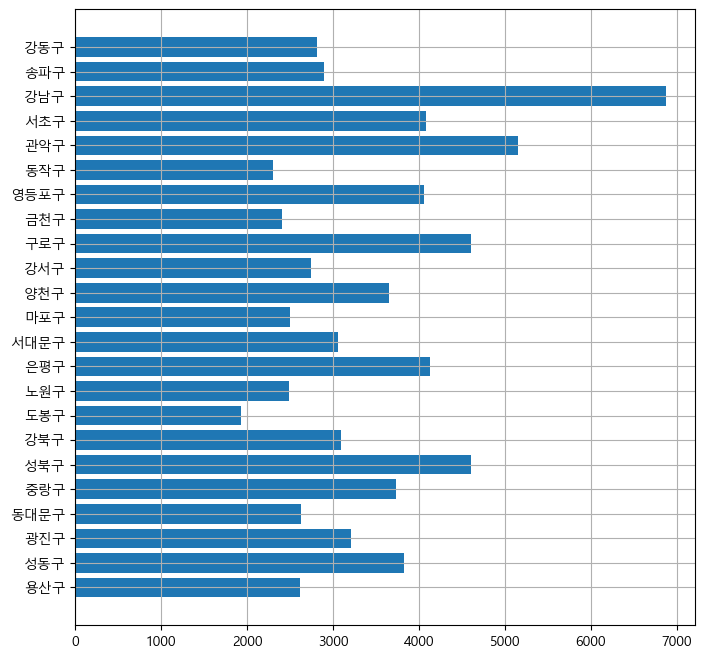

In [69]:
#그리고 그림그리기 시작 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.barh(merged_df.index , merged_df["소계"])
plt.grid()
plt.show()

In [ ]:
#★★★★★★★★★★★★★★★★★★★★★★★★★★★★
#2교수님한테 물어보기 위에 그래프에

ax.barh(merged_df.index , merged_df["소계"].sort_values())
이것과

ax.barh(merged_df.index , merged_df["소계"] 
이것의 그래프가 왜 틀린지 
        
# ★★★★★★★★★★★★★★★★★★★★★★★★★★★        

In [22]:
# pyreadstat -> 이건 prompt 창에서 설치
# 명령어 
#activate CW_AI
#pip install pyreadstat


welfare = pd.read_spss('C:/Users/carlo/Desktop/AI_CWNU/documents/Koweps_hpwc14_2019_beta2.sav')
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [23]:
welfare = welfare.rename(columns = {"h14_g3" : "sex" , "h14_g4" : "birth" ,
                                   "h14_g10" : "marriage_type" , "h14_g11" : "religion",
                                   "p1402_8aq1" : "income" , "h14_eco9" : "code_job",
                                   "h14_g7" : "code_region" })

welfare = welfare[["sex","birth","marriage_type","religion","income","code_job","code_region"]]
welfare

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,5.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,5.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,3.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,5.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [24]:
welfare["sex"].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [25]:
#위에보면 1을 female  2 를 male로 해줌. 
welfare["sex"] = np.where(welfare["sex"] == 1 , 'male', "female")


In [31]:
welfare["sex"].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [32]:
welfare.isna().sum()

sex                 0
birth               0
marriage_type       0
religion            0
income           9884
code_job         7540
code_region         0
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

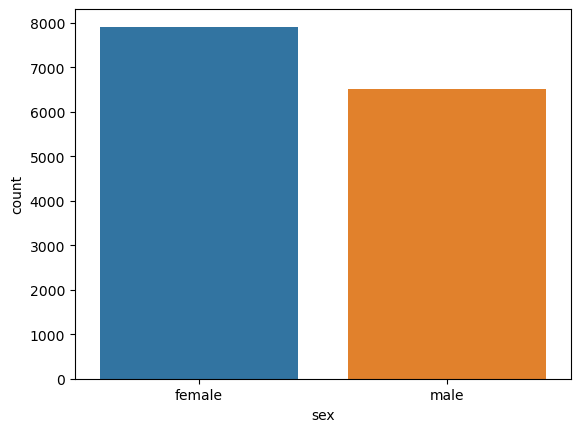

In [35]:
sns.countplot(x = "sex" , data = welfare)

<Axes: xlabel='income', ylabel='Count'>

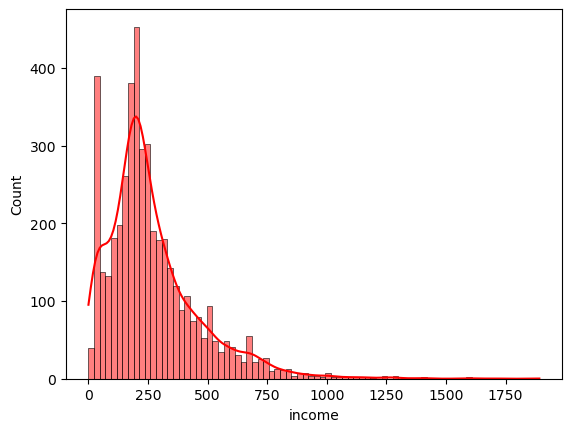

In [42]:
#히스토그램, histplot()
sns.histplot(x = "income" , data = welfare , kde=True, color= "red")

In [43]:
#결측치 확인
welfare["income"].isna().sum()

9884

In [44]:
#결측치 제거 후 남녀 평균 소득 구하기
welfare = welfare.dropna(subset = ["income"])

sex_income = welfare.groupby("sex", as_index = False).\ # \는 2줄로 뛰울때 연결해줌 . 
                            agg(mean_income = ("income" , "mean"))
# as index 가없으면  기본값으로 index로 만들어버리는데 이걸 false해서 없앰


sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

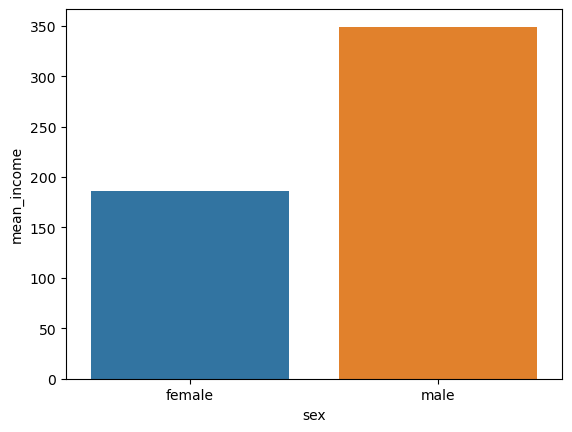

In [46]:
sns.barplot(x="sex",y= "mean_income", data = sex_income)


In [47]:
#몇 살때 소득이 가장 많을까? 
welfare["birth"].describe()

count    4534.000000
mean     1971.144685
std        15.290056
min      1928.000000
25%      1961.000000
50%      1972.000000
75%      1982.000000
max      2001.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

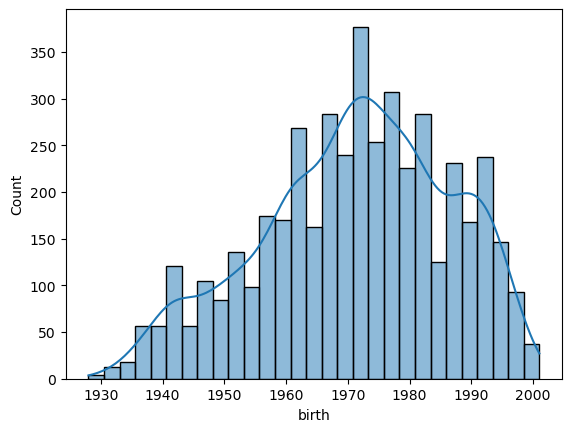

In [49]:
sns.histplot(x="birth", data=welfare, kde = True)

In [50]:
#파생변수
#열들이 있는데 그걸 조합해서 새로 만드는것. 
welfare =welfare.assign(age = 2023  - welfare["birth"] +1)
welfare

,sex,birth,marriage_type,religion,income,code_job,code_region,age
2,male,1942.0,3.0,1.0,107.0,762.0,3.0,82.0
3,male,1962.0,1.0,1.0,192.0,855.0,5.0,62.0
7,female,1934.0,1.0,1.0,27.0,941.0,5.0,90.0
8,female,1940.0,2.0,1.0,27.0,999.0,3.0,84.0
14,male,1978.0,1.0,2.0,338.0,312.0,5.0,46.0
...,...,...,...,...,...,...,...,...
14401,male,1966.0,1.0,1.0,280.0,874.0,5.0,58.0
14402,female,1962.0,1.0,1.0,209.0,930.0,5.0,62.0
14405,female,1947.0,2.0,2.0,27.0,941.0,0.0,77.0
14410,male,1956.0,1.0,1.0,200.0,854.0,5.0,68.0


<Axes: xlabel='age', ylabel='Count'>

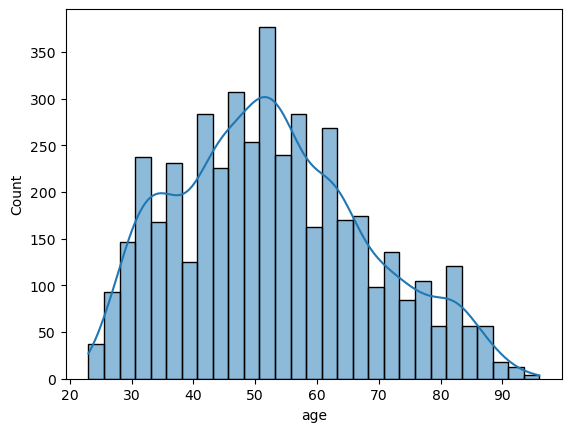

In [55]:
sns.histplot(x = "age" , data = welfare , kde=True)

In [56]:
#나이별로 얼마씩 버는지 알려줌. 
age_income = welfare.groupby("age").agg(mean_income=("income" , "mean"))
age_income

,mean_income
age,
23.0,162.000000
24.0,121.333333
25.0,136.400000
26.0,123.666667
27.0,179.676471
...,...
92.0,27.000000
93.0,27.000000
94.0,27.000000


<Axes: xlabel='age', ylabel='mean_income'>

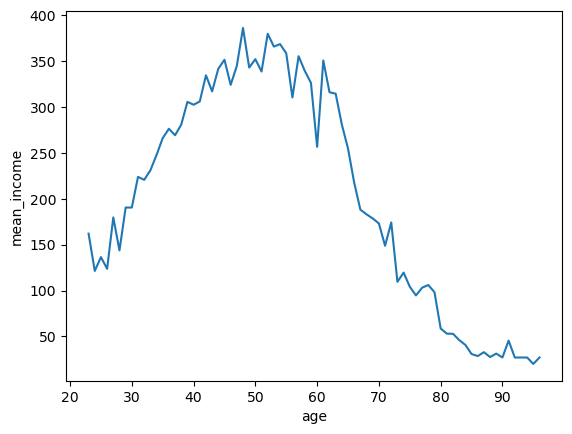

In [60]:
sns.lineplot(x="age" , y="mean_income" , data = age_income)


In [77]:
#연령대 별로 월급확인
welfare = welfare.assign(ageg = np.where(welfare["age"] < 30 , "young",np.where(welfare["age"] <=59 , "middle","old")))
#np where 에 age 가 30이하이면 young , np where 안에 age 가 59 작거나같으면 middle 그렇지 않으면 old로 채운다. 

welfare["ageg"].value_counts()

middle    2897
old       1447
young      190
Name: ageg, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

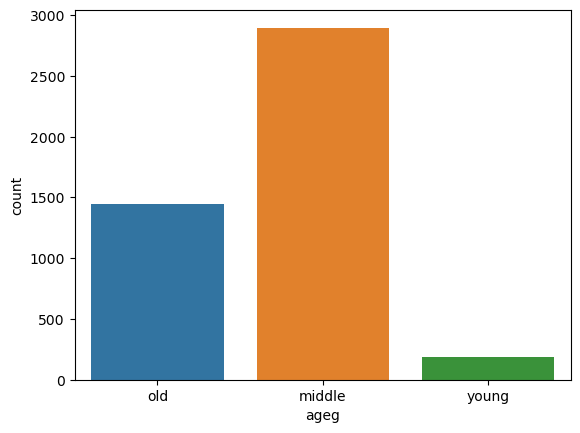

In [78]:
sns.countplot(x ="ageg" , data=welfare )

In [79]:
ageg_income = welfare.groupby("ageg", as_index = False).agg(mean_income=("income","mean"))
ageg_income

,ageg,mean_income
0,middle,318.787366
1,old,181.846579
2,young,160.610526


In [87]:
# welfare[(welfare["income"] >= 500) & (welfare[welfare["ageg"] =="young"])] #잘못된 예 x 
welfare[(welfare["income"] >= 500) & (welfare["ageg"] == "old")] # 잘된예


,sex,birth,marriage_type,religion,income,code_job,code_region,age,ageg
826,male,1962.0,1.0,1.0,583.0,235.0,5.0,62.0,old
868,male,1963.0,1.0,1.0,750.0,772.0,5.0,61.0,old
933,male,1952.0,1.0,2.0,682.0,313.0,5.0,72.0,old
1033,male,1962.0,1.0,1.0,583.0,312.0,5.0,62.0,old
1123,male,1962.0,1.0,1.0,500.0,252.0,5.0,62.0,old
...,...,...,...,...,...,...,...,...,...
13290,male,1955.0,1.0,1.0,660.0,248.0,5.0,69.0,old
13441,male,1960.0,1.0,2.0,575.0,311.0,5.0,64.0,old
13883,male,1964.0,1.0,2.0,759.0,252.0,5.0,60.0,old
13964,male,1962.0,1.0,2.0,806.0,312.0,4.0,62.0,old


<Axes: xlabel='income', ylabel='Count'>

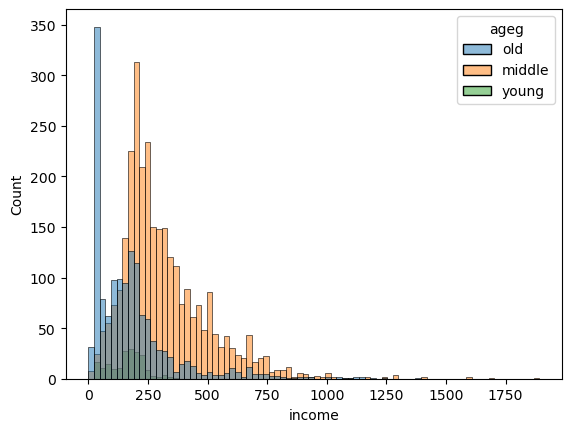

In [89]:
sns.histplot(x =  "income" , data = welfare , hue="ageg")

In [91]:
sex_income = welfare.groupby(["ageg" , "sex"], as_index= False).agg(mean_income= ("income","mean"))
sex_income

,ageg,sex,mean_income
0,middle,female,235.104262
1,middle,male,388.250158
2,old,female,109.727503
3,old,male,268.323708
4,young,female,160.042254
5,young,male,162.291667


<Axes: xlabel='ageg', ylabel='mean_income'>

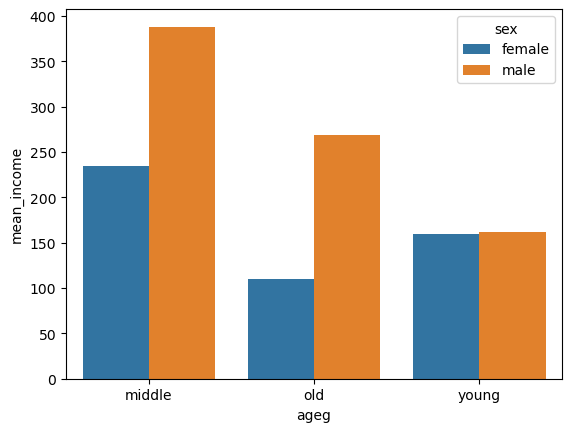

In [94]:
sns.barplot(x = "ageg" , y = "mean_income", data= sex_income , hue="sex")

In [101]:
#남녀 평균 소득 평균 
sex_age = welfare.groupby(["age", "sex"], as_index=False).agg(mean_income=("income", "mean"))


<Axes: xlabel='age', ylabel='mean_income'>

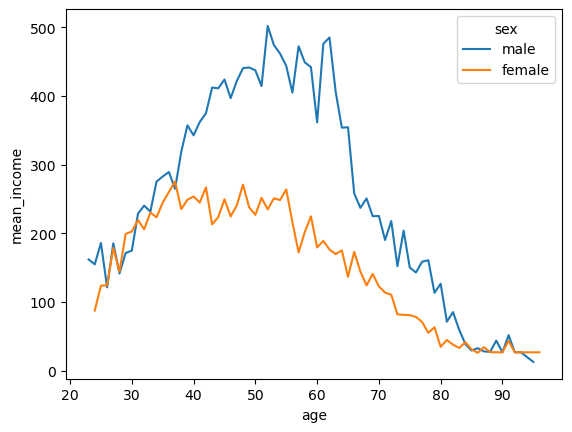

In [103]:
sns.lineplot(x="age", y="mean_income" , data=sex_age , hue="sex")